<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データの確認" data-toc-modified-id="データの確認-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データの確認</a></span><ul class="toc-item"><li><span><a href="#カラム" data-toc-modified-id="カラム-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>カラム</a></span></li><li><span><a href="#気づき" data-toc-modified-id="気づき-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>気づき</a></span></li></ul></li><li><span><a href="#グラフ化" data-toc-modified-id="グラフ化-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>グラフ化</a></span><ul class="toc-item"><li><span><a href="#price" data-toc-modified-id="price-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>price</a></span></li><li><span><a href="#変数ごとのグラフ化" data-toc-modified-id="変数ごとのグラフ化-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>変数ごとのグラフ化</a></span><ul class="toc-item"><li><span><a href="#気づき" data-toc-modified-id="気づき-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>気づき</a></span></li></ul></li><li><span><a href="#箱ひげ図" data-toc-modified-id="箱ひげ図-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>箱ひげ図</a></span></li></ul></li><li><span><a href="#説明変数の候補" data-toc-modified-id="説明変数の候補-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>説明変数の候補</a></span></li><li><span><a href="#欠測値と異常値の処理" data-toc-modified-id="欠測値と異常値の処理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>欠測値と異常値の処理</a></span><ul class="toc-item"><li><span><a href="#欠損値" data-toc-modified-id="欠損値-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>欠損値</a></span></li><li><span><a href="#異常値" data-toc-modified-id="異常値-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>異常値</a></span></li></ul></li><li><span><a href="#使えそうなアルゴリズム候補" data-toc-modified-id="使えそうなアルゴリズム候補-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>使えそうなアルゴリズム候補</a></span><ul class="toc-item"><li><span><a href="#Lasso-を使ってみる" data-toc-modified-id="Lasso-を使ってみる-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Lasso を使ってみる</a></span></li><li><span><a href="#係数の確認" data-toc-modified-id="係数の確認-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>係数の確認</a></span></li></ul></li></ul></div>

# 課題中間
川邉雄太

* 選んだ課題： [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

## データの確認

https://www.kaggle.com/harlfoxem/housesalesprediction

アメリカのワシントン州キング郡の住宅販売価格（2014.05 - 2015.05）。
キング郡にはシアトルも含まれる。

### カラム
カラムの説明とmetricsが書いてあるので確認。

https://www.kaggle.com/harlfoxem/housesalesprediction/data

* square footage: 平方フィート

 1平方メートル = 10.76平方フィート

一部抜粋

|column name|説明|型|コメント|
|-|-|-|-|
|price|Price is prediction target|Numeric|単位はドル（？）|
|date|日付|String|372あって、約一年分のデータだとここからもわかる|
|sqft_lot|lot（土地面積？）の平方フィート|Numeric||
|sqrt_living|総床面積？（平方フィート）|Numeric||
|sqrt_above|地下階以外の面積|Numeric||
|sqrt_basement|地下階の面積|Numeric||
|waterfront|海沿いであるか？|Numeric|Numericと書きつつ、0 or 1|
|view|Has been viewed|Numeric|これなんだ？買うまでの見学回数ってこと？|

### 気づき
* sqrt_living, sqrt_lot, sqrt_above, sqrt_basement の四つの違いがいまいちわからないけど、マルチコの匂いがする。
   - sqrt_living = sqrt_above + sqrt_basement ?
* zipcode（郵便番号）とlat, longも関連性があるはず。
* 意味を考えると、 `sqft_living` などの面積、 `zipcode` `lat` `long` などの場所、 `grade` などの建物についての変数が重要そう。

In [5]:
#グラフをnotebook内に描画させるための設定
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# pandasでの表示列を増やす
# see: http://uyamazak.hatenablog.com/entry/2016/09/29/163534
pd.set_option("display.max_column", 101)

In [6]:
df_data = pd.read_csv("./kc_house_data.csv", parse_dates=['date'])
display(df_data.info())
display(df_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## グラフ化

### price
まず `price` のヒストグラムをみてみる。

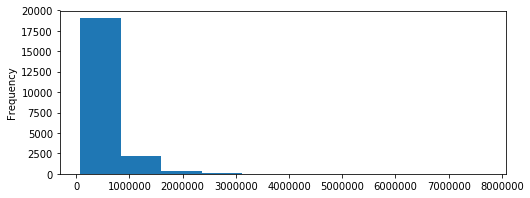

In [7]:
df_data['price'].plot.hist(x='price', figsize=(8,3))

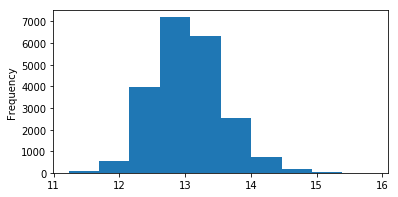

In [8]:
s_price_log = np.log(df_data['price'])
s_price_log.plot.hist(x='price', figsize=(6,3))

### 変数ごとのグラフ化
各変数ごとに、左にヒストグラム、右に `price` との散布図を表示する。

#### 気づき
* 右肩上がりの傾向がある変数が多い。
  - `sqft_living` `grade` `sqft_above` `sqft_basement`
* `sqft_lot` は、対数化する方が見やすそう。土地が広いからといって価格が高いわけではない。つまり右肩上がりではない。
  - 北海道の郊外は土地が広そうだが、高いとは限らない。

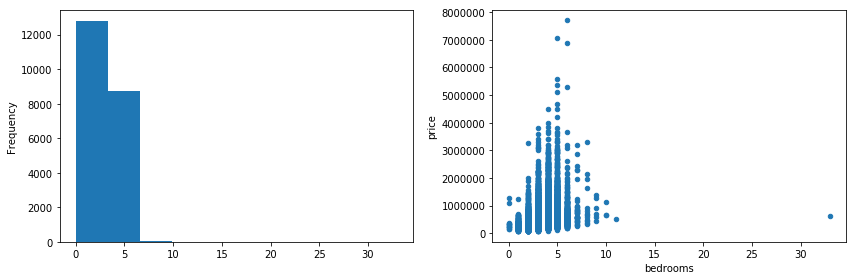

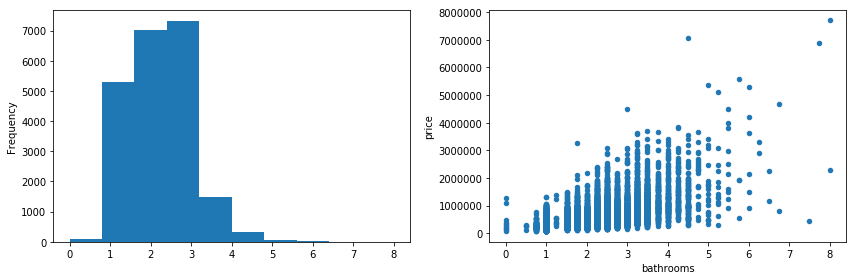

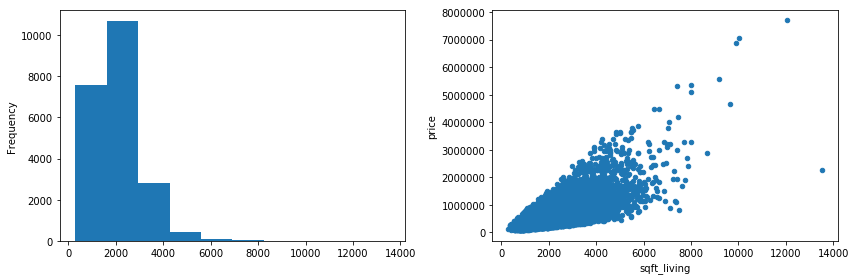

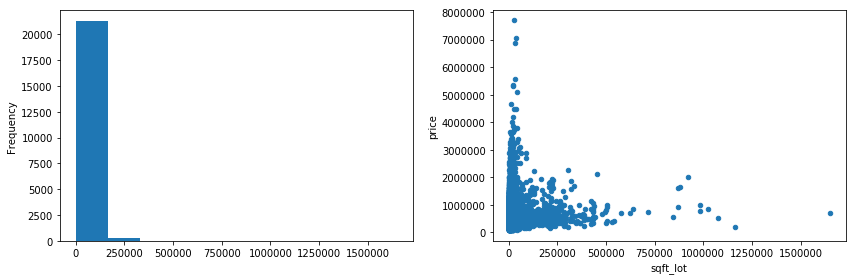

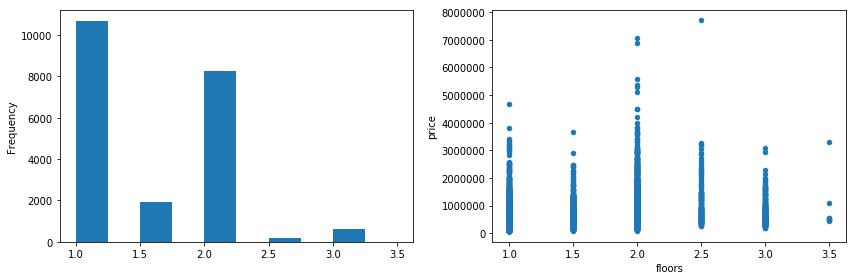

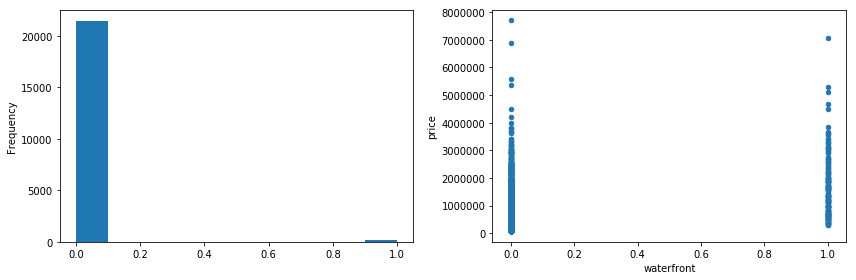

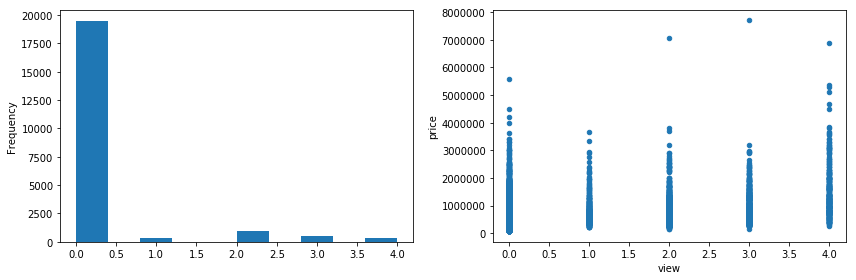

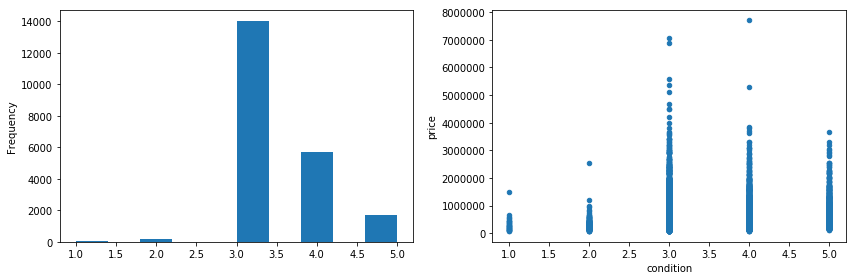

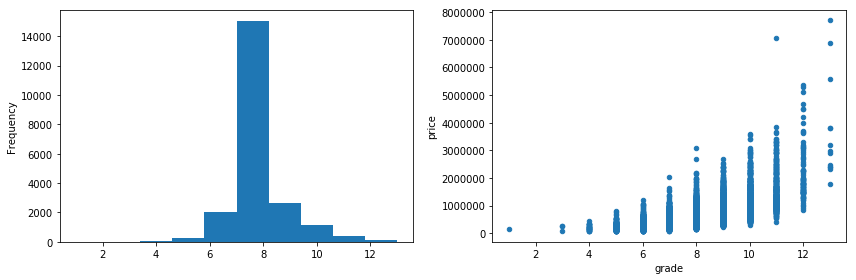

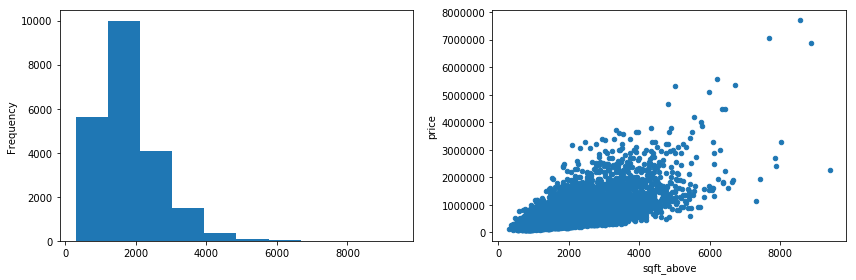

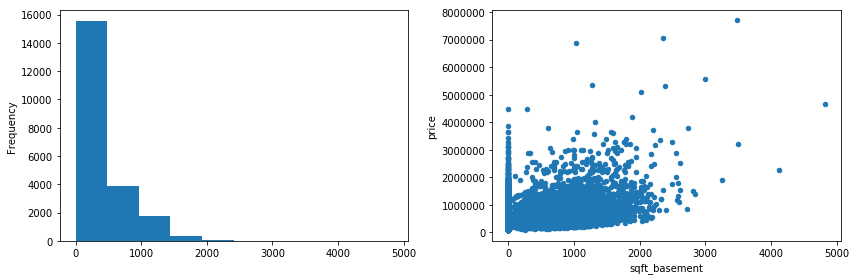

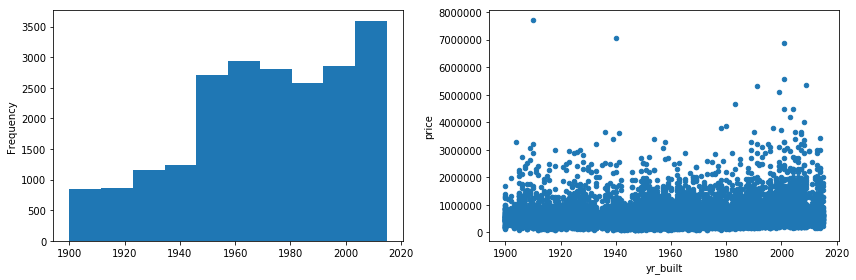

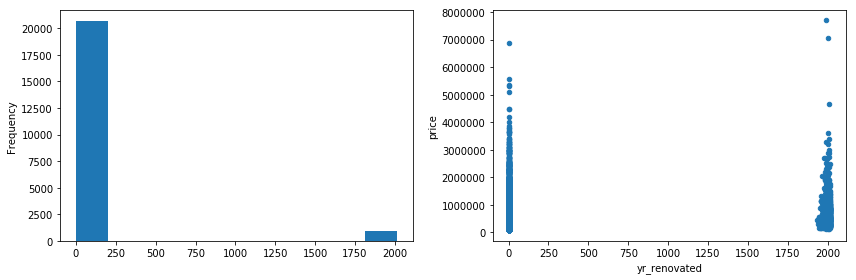

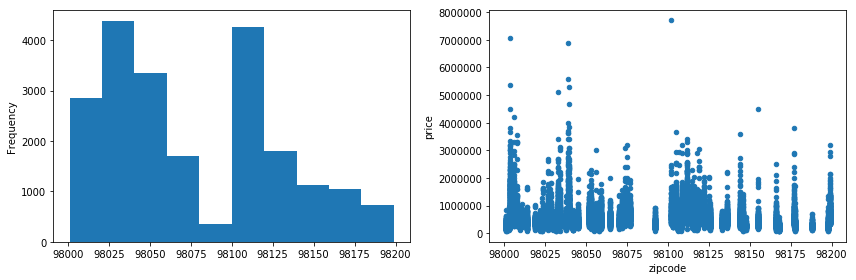

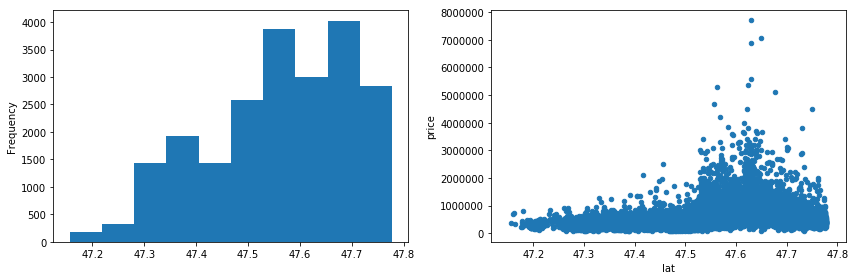

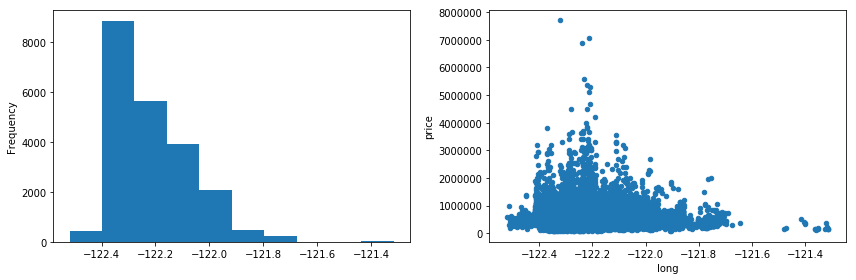

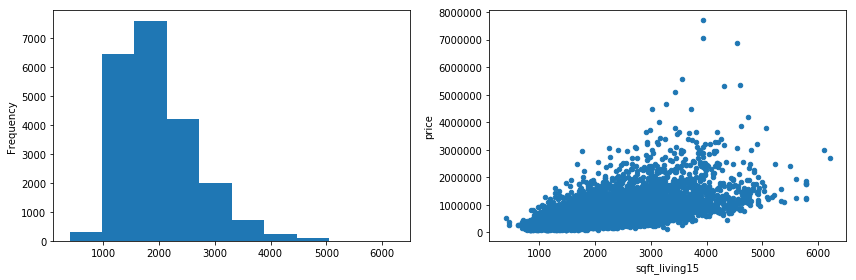

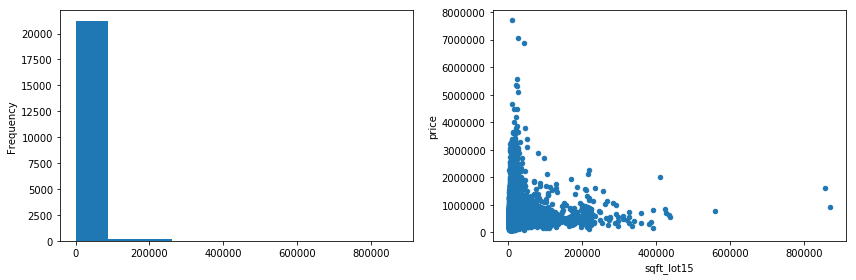

In [9]:
cols = [x for x in df_data.columns if x not in ('id', 'price', 'date')]

for i, col in enumerate(cols):
    fig, axes = plt.subplots(1, 2, figsize = (12, 4))
    df_data[col].plot.hist(ax=axes[0])
    df_data.plot.scatter(x=col, y = 'price', ax=axes[1])
    fig.tight_layout()

### 箱ひげ図

異常値の観点で `bedrooms` `sqft_lot` `sqft_lot15` で大きい値があるのが気になる。

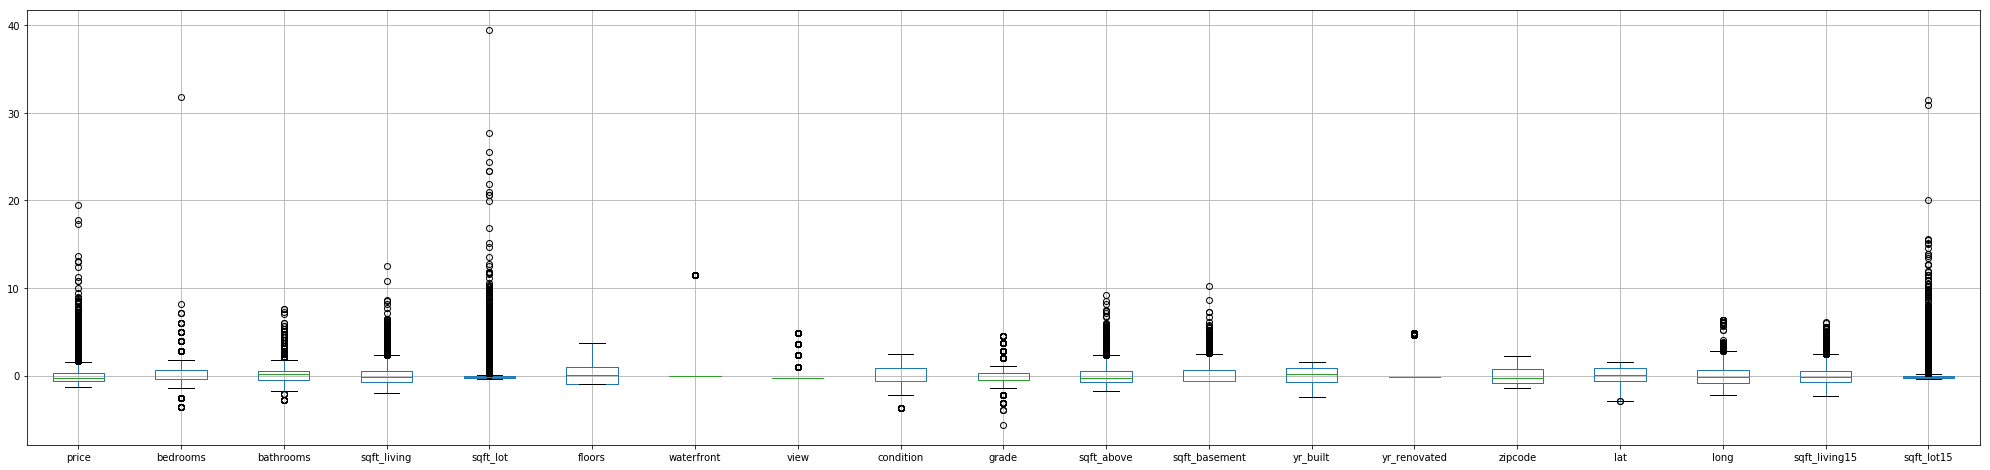

In [10]:
plt.figure(figsize=(35, 8))
df_stand_origin = df_data.drop(columns=['id', 'date'])
ts_stand = (df_stand_origin - df_stand_origin.mean()) / df_stand_origin.std()
ts_stand.boxplot()

## 説明変数の候補

* `sqft_living` = `sqft_above` + `sqft_basement` であることを確認する。

In [11]:
(df_data['sqft_living'] - df_data['sqft_above'] - df_data['sqft_basement']).sum()

0

* sqft_living は削除。 `sqft_living` = `sqft_above` + `sqft_basement` であるため。
  `sqft_above` `sqft_basement` は有用そう。
* zipcode は Target Encodingを行い、カテゴリ内のpriceの平均値を取ることにする。
  - `zipcode` `lat` `long` でもっといい使い方がある気がする。
* 建物の価値を表すと考えると、 `grade` も有用そう。  

## 欠測値と異常値の処理

### 欠損値
欠損値は無しなので、対応無し。


In [13]:
df_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### 異常値

*（ちゃんと出来てない）*

以下の2データを削除。

* id = 2402100895 は `bedrooms` が 33で明らかに多く、
* id = 1225069038 は `sqft_living` が一番大きい割に、値段は228万ドルと2位よりかなり低い。

## 

* dateは削除。とりあつかいが難しいため。
* yr_renovated は、 リノベーションしたかどうかの 0 or 1の値とする。

In [14]:
df_en = df_data.drop(columns=['sqft_living', 'date'], axis=1)

In [15]:
df_en['is_renovated'] =  [ 1 if year > 0 else 0 for year in df_en['yr_renovated']]
df_en[['yr_renovated', 'is_renovated']].head(20)

,yr_renovated,is_renovated
0,0,0
1,1991,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [16]:
temp = df_en['price'].groupby(df_en['zipcode']).mean()
temp

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
98006    8.596848e+05
98007    6.171051e+05
98008    6.455074e+05
98010    4.236660e+05
98011    4.903515e+05
98014    4.556171e+05
98019    4.247887e+05
98022    3.157093e+05
98023    2.867328e+05
98024    5.805268e+05
98027    6.169906e+05
98028    4.624800e+05
98029    6.126536e+05
98030    2.961880e+05
98031    3.005399e+05
98032    2.512962e+05
98033    8.037195e+05
98034    5.216529e+05
98038    3.668676e+05
98039    2.160607e+06
98040    1.194230e+06
98042    3.116321e+05
98045    4.394711e+05
98052    6.452315e+05
98053    6.781631e+05
             ...     
98092    3.349211e+05
98102    9.012583e+05
98103    5.849192e+05
98105    8.628252e+05
98106    3.195814e+05
98107    5.790534e+05
98108    3.556785e+05
98109    8.796236e+05
98112    1.095499e+06
98115    6.199005e+05
98116    6.186342e+05
98117    5.767950e+05
98118    4.176374e+05
98119    8.494480e+05
98

In [17]:
df_en['zipcode_dummy'] = [temp[zipcode] for zipcode in df_en['zipcode']]
df_en[['zipcode', 'zipcode_dummy']]

,zipcode,zipcode_dummy
0,98178,3.106128e+05
1,98125,4.694558e+05
2,98028,4.624800e+05
3,98136,5.516887e+05
4,98074,6.856058e+05
5,98053,6.781631e+05
6,98003,2.941113e+05
7,98198,3.028789e+05
8,98146,3.594832e+05
9,98038,3.668676e+05


In [18]:
dropIndex = df_en.index[df_en['id'].isin([1225069038, 2402100895])]
dropIndex

Int64Index([12777, 15870], dtype='int64')

In [19]:
df_en = df_en.drop(index=dropIndex, columns=['zipcode', 'yr_renovated'])
df_en

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,is_renovated,zipcode_dummy
0,7129300520,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0,3.106128e+05
1,6414100192,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1,4.694558e+05
2,5631500400,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0,4.624800e+05
3,2487200875,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0,5.516887e+05
4,1954400510,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0,6.856058e+05
5,7237550310,1225000.0,4,4.50,101930,1.0,0,0,3,11,3890,1530,2001,47.6561,-122.005,4760,101930,0,6.781631e+05
6,1321400060,257500.0,3,2.25,6819,2.0,0,0,3,7,1715,0,1995,47.3097,-122.327,2238,6819,0,2.941113e+05
7,2008000270,291850.0,3,1.50,9711,1.0,0,0,3,7,1060,0,1963,47.4095,-122.315,1650,9711,0,3.028789e+05
8,2414600126,229500.0,3,1.00,7470,1.0,0,0,3,7,1050,730,1960,47.5123,-122.337,1780,8113,0,3.594832e+05
9,3793500160,323000.0,3,2.50,6560,2.0,0,0,3,7,1890,0,2003,47.3684,-122.031,2390,7570,0,3.668676e+05


## 使えそうなアルゴリズム候補
* Lasso回帰
  - 線形回帰 + 正則化項
  - 広いほど価格が高い・gradeが高いほど価格が高いなど、住宅価格は基本的に線形的であると思う。その上で正則化項をつけて自ら変数選択をしなくてすむ。
* ランダムフォレスト
  - 質的変数も混ざっているので、ランダムフォレストが有効かもしれない。
* xgboost
  - kaggleで大人気らしい。
  - アルゴリズム詳細はよく知らない、これから勉強する。
  - 名前がかっこいい。

### Lasso を使ってみる

In [22]:
stdsc = StandardScaler()

X = stdsc.fit_transform(df_en.drop(columns=['id', 'price']))
y = df_en['price']

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2,random_state=42)



In [24]:
df_result = pd.DataFrame()
models = []
alphas = [0.1, 1, 10, 100, 1000, 10000, 50000, 100000]

for alpha in alphas:
    kf = KFold(n_splits=5, random_state=1234, shuffle=True)
    
    for i,(train_index, val_index) in enumerate(kf.split(X_train, y_train)):
        X_train_train, X_train_val = X_train[train_index], X_train[val_index]
        y_train_train, y_train_val = y_train[train_index], y_train[val_index]

        lasso = Lasso(alpha = alpha)
        lasso.fit(X_train_train, y_train_train)
        models.append(lasso)
        y_pred = lasso.predict(X_train_val)
        df = pd.DataFrame({"y_val":y_train_val, "y_pred":y_pred})
        df_result = pd.concat([df_result, df], axis=0)

    # validation dataによる評価指標の算出
    y_val = df_result["y_val"]
    y_pred = df_result["y_pred"]
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    print('alpha={0}'.format(alpha))
    print("MSE=%s"%round(mse,3) )
    print("RMSE=%s"%round(np.sqrt(mse), 3) )
    print("MAE=%s"%round(mae,3) )


alpha=0.1
MSE=27608398278.618
RMSE=166157.751
MAE=99919.316
alpha=1
MSE=27608399826.039
RMSE=166157.756
MAE=99918.979
alpha=10
MSE=27608411638.242
RMSE=166157.791
MAE=99916.691
alpha=100
MSE=27608584896.169
RMSE=166158.313
MAE=99898.786
alpha=1000
MSE=27616437143.853
RMSE=166181.94
MAE=99770.517
alpha=10000
MSE=27829292845.569
RMSE=166821.14
MAE=99356.146
alpha=50000
MSE=29550064177.894
RMSE=171901.321
MAE=100749.862
alpha=100000
MSE=33403803780.894
RMSE=182767.075
MAE=105265.683


結局 `alpha` = 10000 で計算してみる。

In [25]:
lasso = Lasso(alpha = 10000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# validation dataによる評価指標の算出
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('alpha={0}'.format(10000))
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

alpha=10000
MSE=33772840868.992
RMSE=183773.885
MAE=102406.945


### 係数の確認
* `zipcode_dummy` が一番影響の強い変数ということになっている。
   - `lat` `long` と合わせて、もっとうまい変数の使い方があるのでは？
   
* `sqft_above` `grade` `sqft_basement` が高いのは順当

In [36]:
pd.DataFrame({'param': lasso.coef_, 'abs(param)': abs(lasso.coef_)}, index=df_en.drop(columns=['id', 'price']).columns).sort_values(by=['abs(param)'], ascending=False)

,abs(param),param
zipcode_dummy,143686.029864,143686.029864
sqft_above,130539.085304,130539.085304
grade,69034.413873,69034.413873
sqft_basement,51388.612650,51388.612650
waterfront,43931.999887,43931.999887
view,43389.803751,43389.803751
yr_built,31766.217431,-31766.217431
long,19141.416641,-19141.416641
lat,12140.165932,12140.165932
bathrooms,8642.080005,8642.080005
